# Tanzania Water Wells Prediction

### 1. Business Understanding

#### Problem Statement

Many people in Tanzania and millions of other people worldwide still lack access to clean, safe water, despite the fact that water is a vital resource for life. A large segment of the Tanzanian populace struggles on a daily basis to obtain adequate and dependable supplies of water. In addition to having an impact on their health and general well-being, this problem impedes socioeconomic advancement and feeds the poverty cycle.

Of its 59 million inhabitants, 16 million (28% of the total) do not have access to clean water, and 44 million (73%) do not have access to well run home sanitary facilities. Significant obstacles still stand in the way of guaranteeing all communities in Tanzania have consistent, sustainable access to clean water, despite efforts to enhance water access. Insufficient predictive models for water wells make it difficult to plan and allocate resources effectively, which leads to poor well yields, insufficient maintenance plans, and inefficient drilling sites. Communities thus still experience a lack of clean water, health hazards from tainted water sources, and financial difficulties.

In Tanzania, the current method of drilling water wells is primarily based on experience and local knowledge, which frequently results in uneven outcomes and inefficient use of resources. In addition, the lack of trustworthy data and the intricate interactions between geological, hydrological, and climatic factors make it difficult to pinpoint appropriate well locations and precisely estimate the potential yield of those locations.

#### Objectives

* Create a reliable prediction model for Tanzanian water wells by utilizing statistical methods and machine learning algorithms. Based on the determined influential elements, the model ought to provide an accurate assessment of the possible success rate and yield of water wells. 
* To determine the primary factors that have a major impact on Tanzanian water wells' functionality, conduct a detailed analysis of the dataset.

### 2. Data Understanding: 
This stage consists of the following four tasks, each with a detailed predicted outcome: 

- Gather preliminary data
- Describe data
- Investigate data 
- Confirm data quality

The data for this project was provided by [Driven Data](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/). This data consists of information from various wells in Tanzania.

**Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Data Understanding
# loading the dataset 
data_values = pd.read_csv('Data/Training_set_values.csv')  #training set values
data_labels = pd.read_csv('Data/Training_set_labels.csv')  #training set labels 


In [2]:
# Display dataset
data_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
# display the first 5 rows of the labels
data_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
# Construct a combined DataFrame that joins the label and value data on the 'id' column.
df = pd.merge(data_values, data_labels, on='id')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
# function for info of the data 

def data_info(data):
    """Simple function to provide the info of the data"""
    out = print(data.info(), '\n')
    
    return out

In [6]:
# function for shape of the data 

def data_shape(data):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns", '\n')

    return out

In [7]:
def print_column_types(data):
    """Print categorical and numerical columns in a dataset"""
    # Identify categorical and numerical columns
    categorical_cols = []
    numerical_cols = []
    
    for column in data.columns:
        if data[column].dtype == 'object':
            categorical_cols.append(column)
        else:
            numerical_cols.append(column)
    
    # Print categorical columns
    out = print(f"Categorical Columns:", categorical_cols,'\n')
     
    # Print numerical columns
    out = print(f"Numerical Columns:", numerical_cols,'\n')
    
    return out 

In [8]:
# function to check for duplicates

def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [9]:
# function to check for descriptive stats

def data_describe(data):
    """Simple function to check the descriptive values of the data"""
    out = print(data.describe(), '\n')
    
    return out 

In [10]:
# function to check for unique values in a column
def get_unique_values(data):
        out = print(data.nunique(),'\n')
        return out

In [11]:
# function for data understanding

def explore(data):
    """Group of functions to explore data """
    out1 = data_shape(data)
    out2 = data_info(data)
    out3 = print_column_types(data)
    out4 = data_describe(data)
    
    return out1, out2, out3, out4

In [12]:
explore(df)

The DataFrame has:
	* 59400 rows
	* 41 columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  distr

(None, None, None, None)

In [13]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

The data has 59,400 rows and 40 columns, 9 numeric ones and 31 categorical ones.


In [14]:
df['status_group'].replace({'functional needs repair': 'non functional'}, inplace=True)

In [15]:
df['status_group'].value_counts()

functional        32259
non functional    27141
Name: status_group, dtype: int64

### 3. Data Preparation

Some of the features are similar to each other; they include extraction_type, extraction_type_group, and extraction_type_class. A list of all features is available [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/) In order to reduce the dimensionality of the data, the most generic columns for each overlapped column were kept since the same information being represented at many levels would raise multicollinearity concerns. 

It was also my decision to forgo using a few features, such "num_private," because they did not have feature descriptions that clarified their purpose.

"**extraction_type**" , "**extraction_type_group**" and  "**extraction_type_class**" columns

In [16]:
# Sort the data according to the extraction_type, extraction_type_group, and extraction_type_class.
df.groupby(['extraction_type_class', 'extraction_type_group', 'extraction_type']).size()


extraction_type_class  extraction_type_group  extraction_type          
gravity                gravity                gravity                      26780
handpump               afridev                afridev                       1770
                       india mark ii          india mark ii                 2400
                       india mark iii         india mark iii                  98
                       nira/tanira            nira/tanira                   8154
                       other handpump         other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
                       swn 80                 swn 80                        3670
motorpump              mono                   mono                          2865
                       other motorpum

In this specific case, I want to utilize the 'extraction_type_class' column since it is more descriptive and has less different values than the 'extraction_type' column. 

**'water_quality** and **'quality_group' columns**

In [17]:
df.groupby(['quality_group', 'water_quality']).size()

quality_group  water_quality     
colored        coloured                490
fluoride       fluoride                200
               fluoride abandoned       17
good           soft                  50818
milky          milky                   804
salty          salty                  4856
               salty abandoned         339
unknown        unknown                1876
dtype: int64

The values in the "water_quality" column are more distinct than in the "quality_group" column. with that , the change is not significant. I will hence remove the quality_group field because it contains less information.


'**source**' , '**source_type**' and '**source_class**' columns

In [18]:
df.groupby(['source_class', 'source_type', 'source']).size()

source_class  source_type           source              
groundwater   borehole              hand dtw                  874
                                    machine dbh             11075
              shallow well          shallow well            16824
              spring                spring                  17021
surface       dam                   dam                       656
              rainwater harvesting  rainwater harvesting     2295
              river/lake            lake                      765
                                    river                    9612
unknown       other                 other                     212
                                    unknown                    66
dtype: int64

Although the data for all three attributes is identical, I eliminated the others because the source is the most comprehensive.

**payment** and **payment_type** columns

In [19]:
df.groupby(['payment_type', 'payment']).size()

payment_type  payment              
annually      pay annually              3642
monthly       pay monthly               8300
never pay     never pay                25348
on failure    pay when scheme fails     3914
other         other                     1054
per bucket    pay per bucket            8985
unknown       unknown                   8157
dtype: int64

These two columns are same so I decided to drop one of them.

**waterpoint_type** and **waterpoint_type_group**

In [20]:
df.groupby(['waterpoint_type_group',  'waterpoint_type']).size()

waterpoint_type_group  waterpoint_type            
cattle trough          cattle trough                    116
communal standpipe     communal standpipe             28522
                       communal standpipe multiple     6103
dam                    dam                                7
hand pump              hand pump                      17488
improved spring        improved spring                  784
other                  other                           6380
dtype: int64

I decided to keep 'waterpoint_type' which contains more detail.

**scheme_management** , **management** and **management_group** columns

In [21]:
df['scheme_management'].value_counts(dropna=False)

VWC                 36793
WUG                  5206
NaN                  3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [22]:
df.groupby(['management_group', 'management']).size()

management_group  management      
commercial        company               685
                  private operator     1971
                  trust                  78
                  water authority       904
other             other                 844
                  other - school         99
parastatal        parastatal           1768
unknown           unknown               561
user-group        vwc                 40507
                  water board          2933
                  wua                  2535
                  wug                  6515
dtype: int64

'Management' and'scheme_management' are connected. On the other hand, the'management_group' column has fewer unique values overall and minimal correlation with the other two columns. It is evident that'scheme_management' contains missing data in comparison to'management'. So, it would be better to work with "management" as opposed to "scheme_management." Even so, management_group is less distinctive than management in terms of values. The management column contains some arbitrary elements. As a result, I removed the management column.


'**quantity**' and '**quantity_group**' columns 

In [23]:
df.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

Both columns are exactly similar. I will drop the 'quantity_group' column.

In [24]:
# Removing columns that are not needed for my model
col_to_drop = ['id', 'recorded_by', 'public_meeting', 'installer', 'funder','ward', 'longitude', 'latitude', 'region_code', 'district_code', 
                 'wpt_name','scheme_name', 'extraction_type', 'extraction_type_group',
                 'payment', 'quality_group', 'source', 'source_class', 'quantity_group', 
                 'scheme_management', 'management', 'waterpoint_type_group',
                   'subvillage', 'num_private']

In [25]:
dfn = df.drop(col_to_drop, axis = 1)
dfn.shape

(59400, 17)

In [26]:
print_column_types(dfn)

Categorical Columns: ['date_recorded', 'basin', 'region', 'lga', 'permit', 'extraction_type_class', 'management_group', 'payment_type', 'water_quality', 'quantity', 'source_type', 'waterpoint_type', 'status_group'] 

Numerical Columns: ['amount_tsh', 'gps_height', 'population', 'construction_year'] 



There are 4 numeric columns and 14 category columns in our new dataframe.

#### Data Cleaning

This section will check for:
- Missing Values
- Duplicates
- Outliers

##### Missing values

In [27]:
# helper function to check for missing values

def data_missing(data):
    """Identify if the data has missing values"""
    # identify columns with missing values
    missing_cols = data.columns[data.isnull().any()]
    # calculate number of missing values in each column
    missing_sum = data[missing_cols].isnull().sum()
    # calculate percentage of missing values in each column
    missing_pct = data[missing_cols].isnull().sum() / data.shape[0] * 100

    # check if there are missing values
    if len(missing_cols) == 0:
        out = print("The data has no missing values.")
    else:
        out = print(f"The data has missing values in the following columns:\n{missing_cols}\n\nThe total number of missing values in each column:\n{missing_sum}\n \n{missing_pct}\n")
    return out

In [28]:
data_missing(dfn)

The data has missing values in the following columns:
Index(['permit'], dtype='object')

The total number of missing values in each column:
permit    3056
dtype: int64
 
permit    5.144781
dtype: float64



The 'permit' column contains missing values. Since they make up just 5% of the total column, I plam to remove them.

In [29]:
# Drop the missing values
dfn.dropna(axis=0, subset=['permit'], inplace=True)

##### Duplicated data

When an entry in a dataset occurs more than once, it is referred to as duplicate data. Many factors, including mistakes in data gathering, dataset mergers, and system problems, might result in this duplication. It is crucial to realize that duplicate data can exist naturally in some situations and is not always erroneous or wrong.

But it's important to be aware of how duplicate data may affect the analysis or modeling process when working with it. Duplicate data can add bias and compromise machine learning models' or statistical analysis' accuracy. Specifically, it may result in overfitting, a situation in which the model performs badly on newly discovered data due to its excessive specialization on the duplicated data.

In [30]:
# helper function to check for duplicates

def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [31]:
identify_duplicates(dfn)

The Data has 10518 duplicated rows.
This constitutes 18.667% of the data set. 



The dataset contains duplicates but we will retain them.

##### Outliers
Outliers are data points that significantly deviate from the majority of the other data points in a dataset.

There can be several causes for the presence of outliers:

- Natural variation
- Data entry errors
- Anomalous observations
- Sampling issues
- Data processing errors

In [32]:
def evaluate_outliers(data, sample_size=1000):
    """Function to evaluate outliers in numeric columns and plot their distributions"""
    
    # Select numeric columns
    numeric_columns = data.select_dtypes(include='number').columns
    
    # Randomly sample the data
    data_sample = data.sample(n=sample_size, random_state=42)
    
    # Iterate over numeric columns
    for column in numeric_columns:
        # Plot boxplot for the column
        plt.figure(figsize=(10, 2))
        plt.boxplot(data_sample[column], notch=True, sym='r.')
        plt.xlabel(column)
        plt.ylabel('Value')
        plt.title(f'Boxplot of {column}')
        plt.show()


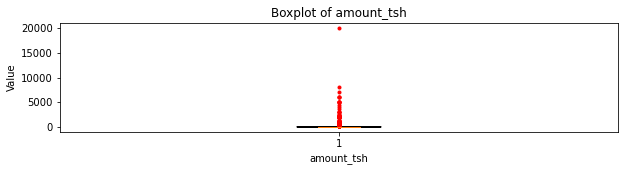

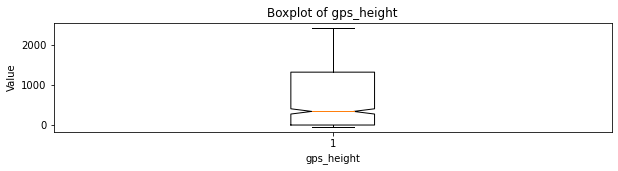

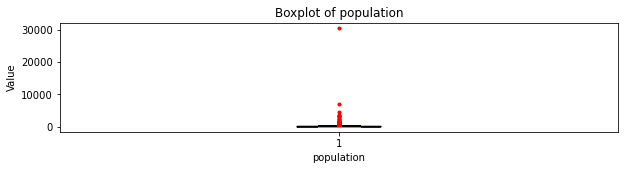

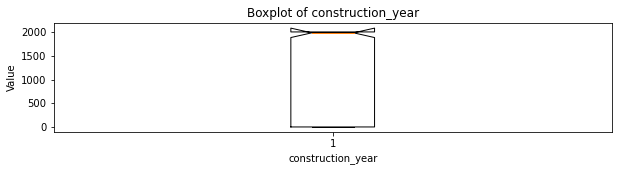

In [33]:
evaluate_outliers(dfn)

Three numeric colmns have outliers but  will work with them.

In [34]:
dfn.columns

Index(['amount_tsh', 'date_recorded', 'gps_height', 'basin', 'region', 'lga',
       'population', 'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'water_quality', 'quantity',
       'source_type', 'waterpoint_type', 'status_group'],
      dtype='object')

##### Data Labeling and Formatting

In [35]:
def rename_and_format_columns(df, column_mapping):
    """
    This function renames and formats the columns of a DataFrame based on the provided mapping.
    The mapping should be a dictionary where the keys are the current column names and the values are the desired new names.
    """
    for old_col, new_col in column_mapping.items():
        new_col = new_col.strip().replace(' ', '_').lower()
        df.rename(columns={old_col: new_col}, inplace=True)

# Example usage:
column_mapping = {
    'lga': 'local_government_area',
    'Column Name 1': 'new_column_1',
    'Column Name 2': 'new_column_2',
}

rename_and_format_columns(dfn, column_mapping)


In [36]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56344 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             56344 non-null  float64
 1   date_recorded          56344 non-null  object 
 2   gps_height             56344 non-null  int64  
 3   basin                  56344 non-null  object 
 4   region                 56344 non-null  object 
 5   local_government_area  56344 non-null  object 
 6   population             56344 non-null  int64  
 7   permit                 56344 non-null  object 
 8   construction_year      56344 non-null  int64  
 9   extraction_type_class  56344 non-null  object 
 10  management_group       56344 non-null  object 
 11  payment_type           56344 non-null  object 
 12  water_quality          56344 non-null  object 
 13  quantity               56344 non-null  object 
 14  source_type            56344 non-null  object 
 15  wa

creating a new column with the construction decades and changing the "date_recorded" column to datetime

### Feature Engineering